In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# !!!THESE ARE ONLY USED TO DOWNLOAD THE MNIST DATASET!!!
from tensorflow import keras

2026-02-19 20:02:28.049889: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Downloading the dataset using keras cause it handles unpacking well and manually doing it would be a headache

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### Analysing the dataset

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Unique labels in training set: [0 1 2 3 4 5 6 7 8 9]


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

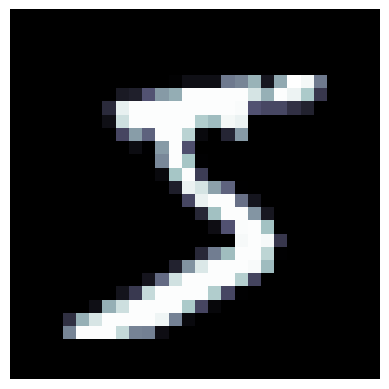

In [5]:
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)
print("Unique labels in training set:", np.unique(y_train))

plt.imshow(x_train[0], cmap='bone')
plt.axis('off')


so we have about `60,000 training` images and `10,000 test` images of size `28x28` pixels with labels 0 to 9

### Making the Neural Net

In [6]:
class Neuron:
    def __init__(self, weights: list[float], bias:float):
        self.weights = weights
        self.bias = bias
        
    def calc_sum(self, input_neuron: list[float]):
        values = np.zeros(len(self.weights))

        for w in range(len(self.weights)):
            r = input_neuron[w]*self.weights[w]
            values[w] = r
        return values, np.sum(values)
    
    def activate(self, summation:float, act_func):
        return act_func(summation) + self.bias
    

class Layer:
    def __init__(self, neurons: list[Neuron]):
        self.neurons = neurons


    def forward(self, act_func, inputs):

        gen_out = np.zeros(len(self.neurons))

        for n in range(len(self.neurons)):
            summation = self.neurons[n].calc_sum(inputs)[1]
            gen_out[n] = self.neurons[n].activate(summation=summation, act_func=act_func)

        return gen_out


#  Activation Functions

def sigmoid(x):
    return 1/((np.e**-x) + 1)

def relu(x):
    if x < 0:
        return 0
    else:
        return x
    
# Data related functions

def flatten_data(x_train, limit=False, limiter=10000):
    flattened_x_images = []

    for i in x_train:
        flattened_x_images.append(i.flatten())
    
    return flattened_x_images


def get_rand_weights(no_neurons):
    return [random.uniform(-0.1, 0.1) for _ in range(no_neurons)]

In [7]:
initial_input_layer = flatten_data(x_train)
initial_input_layer = np.array(initial_input_layer)
initial_input_layer.shape

(60000, 784)

In [28]:
num_neurons = 16

layer1 = Layer([
    Neuron(
        weights=get_rand_weights(initial_input_layer.shape[1]),
        bias=0.0,
    ) 
    for _ in range(num_neurons)
])


layer2 = Layer([
    Neuron(
        weights=get_rand_weights(num_neurons),
        bias=0.0
    )
    for _ in range(num_neurons)
])

layer_output = Layer([
    Neuron(
        weights=get_rand_weights(num_neurons),
        bias=0.0
    )
    for _ in range(len(np.unique(y_train)))
])

#### Test out the Network

Final Output: [0.28960662 0.98183621 0.24071356 0.76658512 0.24111208 0.58561158
 0.4631932  0.76971027 0.11896743 0.95704508]
Prediction: 1
Actual: 5


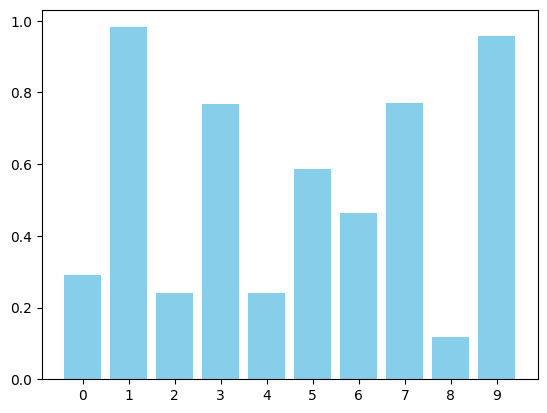

In [29]:
test_image = initial_input_layer[0]
actual_label = y_train[0]

# Pass it through the chain
out1 = layer1.forward(relu, test_image)
out2 = layer2.forward(relu, out1)
final_output = layer_output.forward(sigmoid, out2)

digits = [str(i) for i in range(10)]
plt.bar(digits, final_output, color='skyblue')

print(f"Final Output: {final_output}")
print(f"Prediction: {np.argmax(final_output)}")
print(f'Actual: {actual_label}')

plt.show()

In [30]:
# Checking the accuracy of the network
correct = 0
for index, image in enumerate(initial_input_layer):

    if index > 5000:
        break

    actual_label = y_train[index]

    out1 = layer1.forward(relu, test_image)
    out2 = layer2.forward(relu, out1)
    final_output = layer_output.forward(sigmoid, out2)

    if np.argmax(final_output) == actual_label:
        correct += 1
    
print(f'Accuracy: {correct/len(initial_input_layer)}')

Accuracy: 0.009383333333333334


#### Store the Weights

In [10]:
weight_1 = [i.weights for i in layer1.neurons]
weight_2 = [i.weights for i in layer2.neurons]
weight_out = [i.weights for i in layer_output.neurons]

if not os.path.exists('weights'):
    os.mkdir('weights')

np.savetxt('weights/w_layer1.txt', weight_1)
np.savetxt('weights/w_layer2.txt', weight_2)
np.savetxt('weights/w_layerout.txt', weight_out)


---

### Using the Fashion Dataset as alternative


| Label | Description |
| :--- | :--- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [11]:
(xf_train, yf_train), (xf_test, yf_test) = keras.datasets.fashion_mnist.load_data()


Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Unique labels in training set: [0 1 2 3 4 5 6 7 8 9]


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

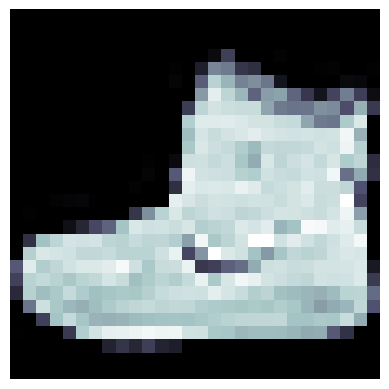

In [12]:
print("Training set shape:", xf_train.shape)
print("Test set shape:", xf_test.shape)
print("Unique labels in training set:", np.unique(yf_train))

plt.imshow(xf_train[0], cmap='bone')
plt.axis('off')


In [13]:
initial_input_layer_f = flatten_data(xf_train)
initial_input_layer_f = np.array(initial_input_layer_f)
initial_input_layer_f.shape

(60000, 784)

In [14]:
num_neurons_f = 16

layer1f = Layer([
    Neuron(
        weights=get_rand_weights(initial_input_layer_f.shape[1]),
        bias=0.0,
    ) 
    for _ in range(num_neurons)
])


layer2f = Layer([
    Neuron(
        weights=get_rand_weights(num_neurons),
        bias=0.0
    )
    for _ in range(num_neurons)
])

layer_outputf = Layer([
    Neuron(
        weights=get_rand_weights(num_neurons),
        bias=0.0
    )
    for _ in range(len(np.unique(y_train)))
])

Final Output: [0.02742675 0.09150226 0.83115757 0.78368382 0.67638453 0.99929848
 0.0450609  0.89871044 0.98645123 0.83006875]
Prediction: 5
Actual: 9


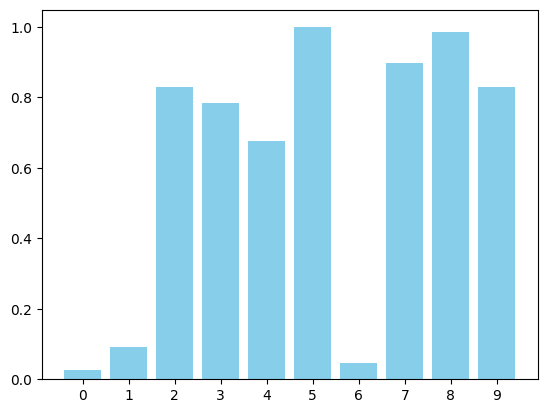

In [15]:
test_image_f = initial_input_layer_f[0]
actual_label_f = yf_train[0]

# Pass it through the chain
out1_f = layer1f.forward(relu, test_image)
out2_f = layer2f.forward(relu, out1)
final_output_f = layer_outputf.forward(sigmoid, out2)

plt.bar(digits, final_output_f, color='skyblue')

print(f"Final Output: {final_output_f}")
print(f"Prediction: {np.argmax(final_output_f)}")
print(f'Actual: {actual_label_f}')

plt.show()

---
